In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
import time

In [2]:
class ExcelChangeHandler(FileSystemEventHandler):
    def __init__(self, excel_file, plot_function):
        self.excel_file = excel_file
        self.plot_function = plot_function

    def on_modified(self, event):
        if event.src_path.endswith(self.excel_file):
            print(f"{self.excel_file} updated. Refreshing plot...")
            self.plot_function()

In [3]:
def plot_excel_data(file_path, ax):
    """Reads Excel file and plots the data."""
    try:
        # Read Excel file
        df = pd.read_excel(file_path, engine='openpyxl')

        # Ensure the DataFrame has the expected format
        if df.shape[1] < 2:
            print("The Excel file must have at least two columns.")
            return
        ax.clear()
        # Plot the data
        plt.figure()
        for column in df.columns[1:]:
            plt.plot(df[df.columns[0]], df[column], label=column)

        plt.xlabel(df.columns[0])
        plt.ylabel("Values")
        plt.legend()
        plt.title("Real-Time Line Plot")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error reading or plotting data: {e}")

In [ ]:
# Path to your Excel file
excel_file = "test_data.xlsx"

# Define the plotting function
def update_plot():
    plot_excel_data(excel_file)

# Set up the watchdog observer
event_handler = ExcelChangeHandler(excel_file, update_plot)
observer = Observer()
observer.schedule(event_handler, path=".", recursive=False)

try:
    print(f"Monitoring changes to {excel_file}... Press Ctrl+C to stop.")
    observer.start()
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Stopping...")
    observer.stop()
observer.join()


In [ ]:
class ExcelChangeHandler(FileSystemEventHandler):
    def __init__(self, excel_file, plot_function):
        self.excel_file = excel_file
        self.plot_function = plot_function

    def on_modified(self, event):
        if event.src_path.endswith(self.excel_file):
            print(f"{self.excel_file} updated. Refreshing plot...")
            self.plot_function()

def plot_excel_data(file_path):
    """Reads Excel file and plots the data."""
    try:
        # Read Excel file
        df = pd.read_excel(file_path, engine='openpyxl')

        # Ensure the DataFrame has the expected format
        if df.shape[1] < 2:
            print("The Excel file must have at least two columns.")
            return

        plt.close('all')

        # Plot the data
        plt.figure()
        for column in df.columns[1:]:
            plt.plot(df[df.columns[0]], df[column], label=column)

        plt.xlabel(df.columns[0])
        plt.ylabel("Values")
        plt.legend()
        plt.title("Real-Time Line Plot")
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error reading or plotting data: {e}")


# Path to your Excel file
excel_file = "test_data.xlsx"

# Define the plotting function
def update_plot():
    plot_excel_data(excel_file)

# Set up the watchdog observer
event_handler = ExcelChangeHandler(excel_file, update_plot)
observer = Observer()
observer.schedule(event_handler, path=".", recursive=False)

try:
    print(f"Monitoring changes to {excel_file}... Press Ctrl+C to stop.")
    observer.start()
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Stopping...")
    observer.stop()
observer.join()


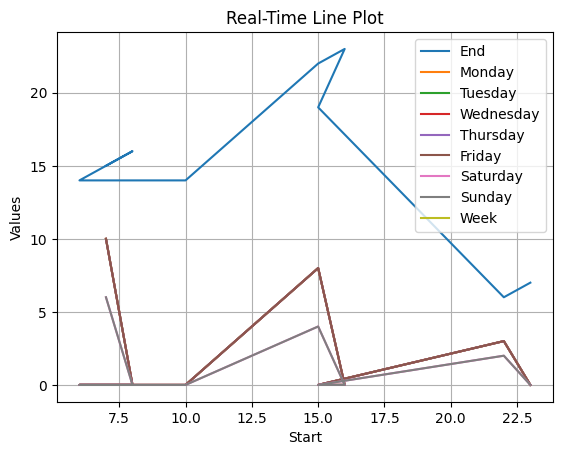

In [23]:
excel_file = "test_data.xlsx"
# try:
df = pd.read_excel(excel_file, engine='openpyxl')

# Ensure the DataFrame has the expected format
if df.shape[1] < 2:
    print("The Excel file must have at least two columns.")

# Plot the data
plt.figure()
for column in df.columns[1:]:
    plt.plot(df[df.columns[0]], df[column], label=column)

plt.xlabel(df.columns[0])
plt.ylabel("Values")
plt.legend()
plt.title("Real-Time Line Plot")
plt.grid(True)
plt.show()
# except Exception as e:
#     print(f"Error reading or plotting data: {e}")